In [133]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import copy

Populating the interactive namespace from numpy and matplotlib


In [134]:
def plot_s_val(inFile, codis_dic, late_dic, early_dic, fig_num):
    
    results = open(inFile, 'r')
    header = results.readline()
    
    name_codis = []
    s_codis = []
    name_late = []
    s_late = []
    name_early = []
    s_early = []
    for line in results:
        # Get information from line
        info = line.strip().split('\t')
        chrom = info[0]
        chrom = 'chr' + str(chrom)
        start = int(info[1])
        end = int(info[2])
        per = int(info[3])
        opt_allele = int(info[4])
        het = float(info[13])
        cont = True
        ABC_s = info[16]
        if ABC_s == 'N/A':
            cont = False
        if cont == True:
            ABC_s = float(info[16])
            p_val = float(info[23])
        
            if (chrom, start) in codis_dic:
                
                name = codis_dic[(chrom, start)]
                name_codis.append(name + " (" + chrom + ":" + str(start) + ")"+ " per:" + str(per) +" opt_ru:" + str(opt_allele))
                s_codis.append(ABC_s)
                del codis_dic[(chrom, start)]

            if (chrom, start) in late_dic:
               
                name = late_dic[(chrom, start)]
                name_late.append(name + " (" + chrom + ":" + str(start) + ")"+" per:" + str(per) + " opt_ru:" + str(opt_allele))
                s_late.append(ABC_s)
                del late_dic[(chrom, start)]

            if (chrom, start) in early_dic:

                name = early_dic[(chrom, start)]
                name_early.append(name + " (" + chrom + ":" + str(start) + ")"+ " per:" + str(per) +" opt_ru:" + str(opt_allele))
                s_early.append(ABC_s)
                del early_dic[(chrom, start)]

            '''
            if name != "":
                objects.append(name + ":" + str(start))
                performance.append(p_val)
            '''
    # Visualize all loci together
    all_name = name_codis + name_late + name_early
    all_s = s_codis + s_late + s_early
    color_codis = ['black'] * len(name_codis)
    color_late = ['blue'] * len(name_late)
    color_early = ['orange'] * len(name_early)
    color_list = color_codis + color_late + color_early
    fig = plt.figure(fig_num)
    fig.set_size_inches((10, 5))
    ax = fig.add_subplot(111)
    y_pos = np.arange(len(all_name))
    plt.bar(y_pos, all_s, color=color_list)
    plt.xticks(y_pos, all_name)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
    #plt.xticks(rotation=-50)
    plt.yscale('log')
    plt.ylabel('Posterior estimate of s')
    plt.title("Selection at example loci")
    ax.text(0.15, 0.95, "CODIS", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.45, 0.95, "Pathogenic \n (late onset)", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.75, 0.95, "Pathogenic \n (early onset)", transform=ax.transAxes, verticalalignment='top')
    #plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Example 2.png',bbox_inches='tight')
    
    '''
    # Visualize each type of loci
    plt.figure(1)
    y_pos = np.arange(len(name_codis))
    plt.bar(y_pos, p_codis)
    plt.xticks(y_pos, name_codis)
    plt.xticks(rotation=70)
    plt.ylabel('P value')
    plt.title("Codis")
    plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Codis.png',bbox_inches='tight')
    
    
    plt.figure(2)
    y_pos = np.arange(len(name_late))
    plt.bar(y_pos, p_late)
    plt.xticks(y_pos, name_late)
    plt.xticks(rotation=70)
    plt.ylabel('P value')
    plt.title("Pathogenic (Late onset)")
    plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Late.png',bbox_inches='tight')
    
    plt.figure(3)
    y_pos = np.arange(len(name_early))
    plt.bar(y_pos, p_early)
    plt.xticks(y_pos, name_early)
    plt.xticks(rotation=70)
    plt.ylabel('P value')
    plt.title("Pathogenic (Early onset)")
    plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Early.png',bbox_inches='tight')
    
    '''
    '''
     fig, axs = plt.subplots(3)
    fig.suptitle('Vertically stacked subplots')
    y_pos_codis = np.arange(len(name_codis))
    axs[1].bar(y_pos_codis, p_codis)
    axs[1].set_xticks(y_pos_codis, name_codis)
    axs[1].set_xticks(rotation=70)
    #axs[2].plot(x, -y)
    '''

In [135]:
def plot_p_val(inFile, codis_dic, late_dic, early_dic, fig_num):
    results = open(inFile, 'r')
    header = results.readline()
    
    name_codis = []
    p_codis = []
    name_late = []
    p_late = []
    name_early = []
    p_early = []
    for line in results:
        # Get information from line
        info = line.strip().split('\t')
        chrom = info[0]
        chrom = 'chr' + str(chrom)
        start = int(info[1])
        end = int(info[2])
        per = int(info[3])
        opt_allele = int(info[4])
        het = float(info[13])
        conf = info[17]
        acc = info[18]
        cont = True
        ABC_s = info[16]
        if ABC_s == 'N/A':
            cont = False
        if cont == True:
            ABC_s = float(info[16])
            p_val = float(info[23])
        
            if (chrom, start) in codis_dic:
                
                name = codis_dic[(chrom, start)]
                name_codis.append(name + " (" + chrom + ":" + str(start) + ")" +" per:" + str(per) + " opt_ru:" + str(opt_allele))
                p_codis.append(-1*np.log10(p_val)) #-1*np.log10()
                del codis_dic[(chrom, start)]
                print(name)
                print(p_val)
                print(conf)
                print(acc)
            if (chrom, start) in late_dic:
               
                name = late_dic[(chrom, start)]
                name_late.append(name + " (" + chrom + ":" + str(start) + ")"+ " per:" + str(per) +" opt_ru:" + str(opt_allele))
                p_late.append(-1*np.log10(p_val))
                del late_dic[(chrom, start)]
                print(name)
                print(p_val)
                print(conf)
                print(acc)
            if (chrom, start) in early_dic:

                name = early_dic[(chrom, start)]
                name_early.append(name + " (" + chrom + ":" + str(start) + ")"+ " per:" + str(per) +" opt_ru:" + str(opt_allele))
                p_early.append(-1*np.log10(p_val))
                
                del early_dic[(chrom, start)]
                print(name)
                print(p_val)
                print(conf)
                print(acc)
            '''
            if name != "":
                objects.append(name + ":" + str(start))
                performance.append(p_val)
            '''
    # Visualize all loci together
    all_name = name_codis + name_late + name_early
    all_p = p_codis + p_late + p_early
    color_codis = ['black'] * len(name_codis)
    color_late = ['blue'] * len(name_late)
    color_early = ['orange'] * len(name_early)
    color_list = color_codis + color_late + color_early
    fig = plt.figure(fig_num)
    fig.set_size_inches((10, 5))
    ax = fig.add_subplot(111)
    y_pos = np.arange(len(all_name))
    plt.bar(y_pos, all_p, color=color_list)
    plt.xticks(y_pos, all_name)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
    #plt.xticks(rotation=-50)
    
    plt.ylabel('p-values [-log10]')
    
    #plt.yscale('log')
    #plt.gca().invert_yaxis()
    plt.title("Selection at example loci")
    ax.text(0.15, 0.95, "CODIS", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.45, 0.95, "Pathogenic \n (late onset)", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.75, 0.95, "Pathogenic \n (early onset)", transform=ax.transAxes, verticalalignment='top')
    #plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Example 2.png',bbox_inches='tight')
    
    '''
    # Visualize each type of loci
    plt.figure(1)
    y_pos = np.arange(len(name_codis))
    plt.bar(y_pos, p_codis)
    plt.xticks(y_pos, name_codis)
    plt.xticks(rotation=70)
    plt.ylabel('P value')
    plt.title("Codis")
    plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Codis.png',bbox_inches='tight')
    
    
    plt.figure(2)
    y_pos = np.arange(len(name_late))
    plt.bar(y_pos, p_late)
    plt.xticks(y_pos, name_late)
    plt.xticks(rotation=70)
    plt.ylabel('P value')
    plt.title("Pathogenic (Late onset)")
    plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Late.png',bbox_inches='tight')
    
    plt.figure(3)
    y_pos = np.arange(len(name_early))
    plt.bar(y_pos, p_early)
    plt.xticks(y_pos, name_early)
    plt.xticks(rotation=70)
    plt.ylabel('P value')
    plt.title("Pathogenic (Early onset)")
    plt.savefig('/storage/BonnieH/selection_project/analysis/special_regions/0326/Early.png',bbox_inches='tight')
    
    '''
    '''
     fig, axs = plt.subplots(3)
    fig.suptitle('Vertically stacked subplots')
    y_pos_codis = np.arange(len(name_codis))
    axs[1].bar(y_pos_codis, p_codis)
    axs[1].set_xticks(y_pos_codis, name_codis)
    axs[1].set_xticks(rotation=70)
    #axs[2].plot(x, -y)
    '''

In [136]:
def main():
    print('Running main')
    
    #inFile = '/storage/BonnieH/selection_project/tscc_dir/final_results/results_everything_new_prior.txt'
    #inFile = '/storage/BonnieH/selection_project/tscc_dir/final_results/trinuc/results_everything.txt'
    #inFile = '/storage/BonnieH/selection_project/tscc_dir/final_results/euro/everything2.txt'
    #inFile = '/storage/BonnieH/selection_project/tscc_dir/final_results/0508/euro0.0006_3_het.txt'
    
    
    # NEED TO DO S HIGH AND P LOW - TOGETHER - COME UP WITH A MEASURE OF THIS?
    # inFile = '/storage/BonnieH/selection_project/tscc_dir/final_results/0612/0.0006_3_0.0006_3_ynnsims20k_new_mut_06011everynew.txt'
    #inFile = '/storage/BonnieH/selection_project/per_locus/final_results/0.0006_3_0.3_yny3_euro_p1.txt'
    inFile = '/storage/BonnieH/selection_project/per_locus/final_results/0.005_3_0.3_yny3_eurodem_pr1.txt'
    codisFile = '/storage/BonnieH/selection_project/annotations/hg38_codis.bed'
    lateonsetFile = '/storage/BonnieH/selection_project/annotations/hg38_lateonset.txt'
    earlyonsetFile = '/storage/BonnieH/selection_project/annotations/hg38_earlyonset.txt'
    codis = open(codisFile, 'r')
    codis_dic = {}
    for line in codis:
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        name = info[5]
        codis_dic[(chrom, start)] = name
    codis.close()    
    
    late = open(lateonsetFile, 'r')
    late_dic = {}
    for line in late:
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        name = info[5]
        late_dic[(chrom, start)] = name
    late.close()
    
    early = open(earlyonsetFile, 'r')
    early_dic = {}
    for line in early:
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        name = info[4]
        early_dic[(chrom, start)] = name
    early.close()
    
    codis_dic_copy = copy.deepcopy(codis_dic)
    late_dic_copy = copy.deepcopy(late_dic)
    early_dic_copy = copy.deepcopy(early_dic)
    plot_p_val(inFile, codis_dic, late_dic, early_dic, 1)
    plot_s_val(inFile, codis_dic_copy, late_dic_copy, early_dic_copy, 2)
    

Running main
TPOX
0.1134476
(0 , 0.00133)
135
HOXD13
0.3050041
(0 , 0.00774)
831
SCA7
0.0426746
(0 , 0.00335)
366
HTT
0.0868036
(0 , 0.0025)
148
PHOX2B
0.1382595
(0 , 0.0025)
88
D5S818
0.0257934
(0 , 0.00333)
1210
SCA12
0.5459388
(0 , 0.00233)
93
CSF1PO
0.0911337
(0 , 0.00254)
1039
SCA1
0.0318757
(0 , 0.00362)
1064
RUNX2
0.5123258
(0 , 0.02111)
3297
SCA17
0.1382595
(0 , 0.00239)
982
D7S820
0.3587036
(0 , 0.00221)
805
D8S1179
0.0710549
(0 , 0.00276)
947
TH01
0.1819106
(0 , 0.00167)
910
DIP2B
0.3678454
(0 , 0.00042)
70
SCA2
0.0011329
(0.00946 , 0.02371)
935
SCA8
0.0249895
(0 , 0.00363)
1056
D13S317
0.1169774
(0 , 0.00253)
675
PABPN1
0.8872563
(0 , 0.05286)
9880
PABPN1
0.9202448
(0 , 0.05277)
9892
SCA3
0.0443138
(0 , 0.00315)
897
D16S539
0.1758229
(0 , 0.00241)
495
D18S51
1.0
(0 , 0.00181)
1189
SCA6
0.1613361
(0 , 0.00207)
92
CPU times: user 990 ms, sys: 19.6 ms, total: 1.01 s
Wall time: 1 s


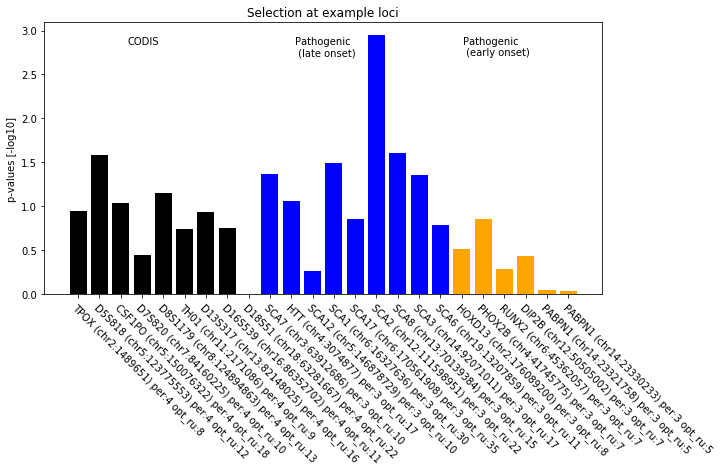

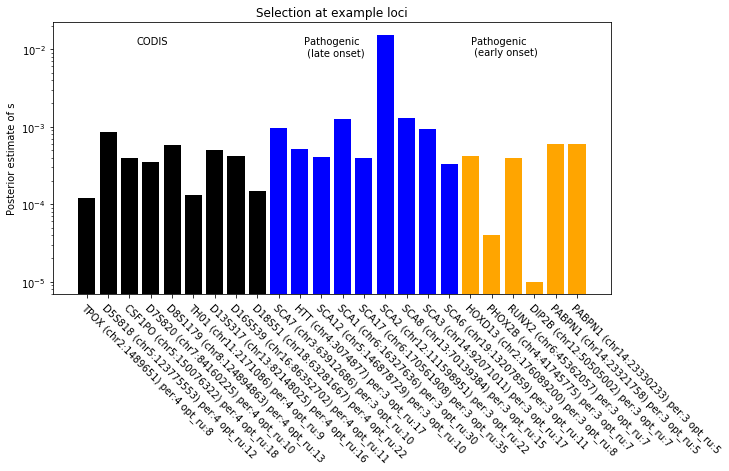

In [137]:
%%time
if __name__ == '__main__':
    main()